# Milestone 3 - Part 1


## Import needed libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.svm import SVR
from scipy.stats import reciprocal
import matplotlib.pyplot as plt

## Data preprocessing

Read the data from cleaned.csv into a data frame, prints the head, description and info of the dataframe

In [2]:
filename = 'cleaned.csv'
# from google.colab import drive
# drive.mount('/content/drive')
# filename = 'drive/MyDrive/CMPS 276/cleaned.csv'
df = pd.read_csv(filename, keep_default_na=False)
cols =list(df.columns)

In [3]:
df.head()

,Country Name,Country Code,Continent Code,Year,Net Migration Rate,Prev1,Prev2,DALYs,HDI,GDP,Life Expectancy,Inflation,Mortality,Healthcare expenditure
0,Afghanistan,AFG,AS,2003,0.2774,-2.7894,-5.8562,75103.762176,0.393,8.832278,57.271,12.686269,41.5,86.069191
1,Afghanistan,AFG,AS,2004,3.3442,0.2774,-2.7894,73137.361976,0.409,1.414118,57.772,12.686269,41.4,84.527596
2,Afghanistan,AFG,AS,2005,6.4110,3.3442,0.2774,71629.722924,0.418,11.229715,58.290,12.686269,40.9,78.970085
3,Afghanistan,AFG,AS,2006,3.6024,6.4110,3.3442,70807.147852,0.429,5.357403,58.826,6.784597,40.5,76.824974
4,Afghanistan,AFG,AS,2007,0.7938,3.6024,6.4110,69128.741446,0.447,13.826320,59.375,8.680571,40.1,78.169991


In [5]:
df.describe()

,Year,Net Migration Rate,Prev1,Prev2,DALYs,GDP,Life Expectancy,Inflation,Mortality,Healthcare expenditure
count,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000
mean,2009.312398,0.287484,0.237890,0.170954,40694.889119,3.386614,69.592508,7.224922,21.702758,35.379785
std,6.555514,9.865855,9.965777,10.081334,21115.401859,5.521180,9.267085,22.844526,8.088504,19.443877
min,1998.000000,-54.746000,-54.746000,-54.746000,15045.113519,-62.075920,42.518000,-18.108630,7.300000,0.080350
25%,2004.000000,-2.890800,-2.966100,-3.061350,25577.262015,1.471357,63.628000,1.626157,15.625000,18.804501
50%,2009.000000,-0.489600,-0.536600,-0.555400,33277.187478,3.652993,71.880500,3.527198,21.500000,32.789396
75%,2015.000000,2.021750,2.034500,2.042550,51397.177891,5.759956,76.483750,7.192498,26.300000,49.923300
max,2020.000000,134.414000,134.414000,134.414000,184708.155967,123.139555,84.356341,557.201817,54.500000,86.069191


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            3662 non-null   object 
 1   Country Code            3662 non-null   object 
 2   Continent Code          3662 non-null   object 
 3   Year                    3662 non-null   int64  
 4   Net Migration Rate      3662 non-null   float64
 5   Prev1                   3662 non-null   float64
 6   Prev2                   3662 non-null   float64
 7   DALYs                   3662 non-null   float64
 8   HDI                     3662 non-null   object 
 9   GDP                     3662 non-null   float64
 10  Life Expectancy         3662 non-null   float64
 11  Inflation               3662 non-null   float64
 12  Mortality               3662 non-null   float64
 13  Healthcare expenditure  3662 non-null   float64
dtypes: float64(9), int64(1), object(4)
memor

The Continent code and HDI features are categorical. The below performs a One-Hot-Encoding to these columns.

In [4]:
encoded = pd.get_dummies(df['Continent Code'])
final_df = pd.concat([df, encoded], axis=1)
# encoded = pd.get_dummies(df['HDI'])
# final_df = pd.concat([final_df, encoded], axis=1)
final_df

,Country Name,Country Code,Continent Code,Year,Net Migration Rate,Prev1,Prev2,DALYs,HDI,GDP,Life Expectancy,Inflation,Mortality,Healthcare expenditure,AF,AS,EU,NA,OC,SA
0,Afghanistan,AFG,AS,2003,0.2774,-2.7894,-5.8562,75103.762176,0.393,8.832278,57.271,12.686269,41.5,86.069191,0,1,0,0,0,0
1,Afghanistan,AFG,AS,2004,3.3442,0.2774,-2.7894,73137.361976,0.409,1.414118,57.772,12.686269,41.4,84.527596,0,1,0,0,0,0
2,Afghanistan,AFG,AS,2005,6.4110,3.3442,0.2774,71629.722924,0.418,11.229715,58.290,12.686269,40.9,78.970085,0,1,0,0,0,0
3,Afghanistan,AFG,AS,2006,3.6024,6.4110,3.3442,70807.147852,0.429,5.357403,58.826,6.784597,40.5,76.824974,0,1,0,0,0,0
4,Afghanistan,AFG,AS,2007,0.7938,3.6024,6.4110,69128.741446,0.447,13.826320,59.375,8.680571,40.1,78.169991,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,Zimbabwe,ZWE,AF,2016,-9.1492,-9.3990,-9.1748,64174.959310,0.558,0.755869,60.294,-1.543670,30.4,23.311034,1,0,0,0,0,0
3658,Zimbabwe,ZWE,AF,2017,-8.8994,-9.1492,-9.3990,62297.147092,0.563,4.709492,60.812,0.893962,29.3,22.806246,1,0,0,0,0,0
3659,Zimbabwe,ZWE,AF,2018,-8.6496,-8.8994,-9.1492,60084.515712,0.569,4.824211,61.195,10.618866,28.5,19.696978,1,0,0,0,0,0
3660,Zimbabwe,ZWE,AF,2019,-8.3998,-8.6496,-8.8994,58969.110822,0.571,-6.144236,61.490,255.304991,28.4,24.376623,1,0,0,0,0,0


Get the input and output columns

In [5]:
x = final_df.loc[:,cols[5]:]
# x = x.drop(columns=['HDI'])
y = final_df.loc[:,cols[4]]

# x = x.drop(columns=['Prev1', 'Prev2'])

In [6]:
print("Shape of the input X:", x.shape)
print("Shape of the output y:", y.shape)

Shape of the input X: (3662, 15)
Shape of the output y: (3662,)


Split the data into 80% training and 20% testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Normalize the input for the Support Vector Regression and the Neural Network

In [8]:
scaler = preprocessing.StandardScaler()  
scaler.fit(X_train)  
X_trainNorm = scaler.transform(X_train)
X_testNorm = scaler.transform(X_test)

Define the below function to print the error metrics of the machine learning model

In [9]:
def print_error_metrics(y_test, y_pred):
    r2 = metrics.r2_score(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mae = metrics.mean_absolute_error(y_test, y_pred)

    print('R2: {:.5f}'.format(r2))
    print('MSE: {:.5f}'.format(mse))
    print('RMSE: {:.5f}'.format(rmse))
    print('MAE: {:.5f}'.format(mae))

The learning curve will help us diagnose the models' bias and variance.

In [10]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, 
                        train_sizes=np.linspace(0.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1)

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring='neg_mean_squared_error', 
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training error"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation error"
    )
    axes.legend(loc="best")
    return plt

## Linear Regression Model

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Intercept:", regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df, '\n')
y_pred = regressor.predict(X_test)
print_error_metrics(y_test, y_pred)

Intercept: -1.6738888283615234
                        Coefficient
Prev1                      1.702505
Prev2                     -0.744201
DALYs                      0.000005
HDI                        0.783067
GDP                        0.007463
Life Expectancy            0.013657
Inflation                 -0.000225
Mortality                 -0.001093
Healthcare expenditure    -0.001780
AF                         0.161158
AS                         0.189573
EU                        -0.074652
NA                        -0.022597
OC                        -0.175970
SA                        -0.077512 

R2: 0.98433
MSE: 1.84989
RMSE: 1.36011
MAE: 0.41936


R2: 0.98487
MSE: 1.78672
RMSE: 1.33668
MAE: 0.42827


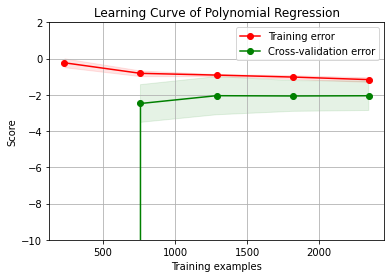

In [12]:
poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression()) 
    ])
plot_learning_curve(poly_regression, 'Learning Curve of Polynomial Regression', X_train, y_train, ylim=(-10,2))
poly_regression.fit(X_train, y_train)
y_pred = poly_regression.predict(X_test)
print_error_metrics(y_test, y_pred)

In [13]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
print("Intercept:", elastic_net.intercept_)
coeff_df = pd.DataFrame(elastic_net.coef_, x.columns, columns=['Coefficient'])
print(coeff_df, '\n')
print_error_metrics(y_test, y_pred)

Intercept: -0.24158805694622243
                        Coefficient
Prev1                      1.658954
Prev2                     -0.696971
DALYs                     -0.000001
HDI                        0.000000
GDP                        0.005650
Life Expectancy            0.004879
Inflation                 -0.000587
Mortality                  0.000000
Healthcare expenditure    -0.001171
AF                         0.000000
AS                         0.000000
EU                        -0.000000
NA                        -0.000000
OC                        -0.000000
SA                        -0.000000 

R2: 0.98397
MSE: 1.89338
RMSE: 1.37600
MAE: 0.42761


## Hyperparameter Tuning and Cross Validation

In [23]:
from sklearn.pipeline import make_pipeline
model0 = make_pipeline(MinMaxScaler(), PolynomialFeatures(), ElasticNet())
model1 = make_pipeline(MinMaxScaler(), SVR())
model2 = make_pipeline(MinMaxScaler(), DecisionTreeRegressor())
model3 = make_pipeline(MinMaxScaler(), RandomForestRegressor())
model4 = make_pipeline(MinMaxScaler(), MLPRegressor())

In [24]:
# define the cross validation using RepeatedKFold (10 folds 10 repeats)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

### Random Hyperparameter Search

In [ ]:
C_range = [int(x) for x in np.linspace(start=1, stop = 10, num = 4)]
random_grid = {'svr__kernel' : ["linear", "rbf"],'svr__C' : C_range},
rand_clf1 = RandomizedSearchCV(estimator=model1, param_distributions=random_grid, cv=cv, verbose=3, n_jobs=2, n_iter=5)

rand_clf1.fit(X_trainNorm, y_train)

# Output:
# {'C': 7, 
# 'kernel': 'linear'}

In [22]:
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 5)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 5, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 5, 7, 10] # minimum sample number that can be stored in a leaf node
max_leaf_nodes = [int(x) for x in np.linspace(10, 150, num = 5)] 

random_grid = {'decisiontreeregressor__max_features': max_features,

'decisiontreeregressor__max_depth': max_depth,

'decisiontreeregressor__min_samples_split': min_samples_split,

'decisiontreeregressor__min_samples_leaf': min_samples_leaf,

'decisiontreeregressor__max_leaf_nodes': max_leaf_nodes,
}

rand_clf2 = RandomizedSearchCV(estimator=model2, param_distributions=random_grid, cv=cv, verbose=3, n_jobs=2, n_iter=10)

rand_clf2.fit(X_train, y_train)
clf2 = rand_clf2

# Output:
# {'min_samples_split': 10,
#  'min_samples_leaf': 3,
#  'max_leaf_nodes': 115,
#  'max_features': 'auto',
#  'max_depth': 115}


Fitting 100 folds for each of 10 candidates, totalling 1000 fits


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 5)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 5)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 5, 10, 20] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'randomforestregressor__n_estimators': n_estimators,

'randomforestregressor__max_features': max_features,

'randomforestregressor__max_depth': max_depth,

'randomforestregressor__min_samples_split': min_samples_split,

'randomforestregressor__min_samples_leaf': min_samples_leaf,

'randomforestregressor__bootstrap': bootstrap}

rand_clf3 = RandomizedSearchCV(estimator=model3, param_distributions=random_grid, cv=cv, verbose=3, n_jobs=2, n_iter=5)

rand_clf3.fit(X_train, y_train)
clf3 = rand_clf3

# Outputs:
# {'bootstrap': False,
#  'max_depth': 92,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 6,
#  'n_estimators': 25}


### Hyperparameter Grid

In [27]:
paramsDict = {
        'elasticnet': {'elasticnet__alpha': [0.1, 0.5, 1],
                        'elasticnet__l1_ratio': [0.25, 0.5, 0.75, 1.0],
                        'elasticnet__max_iter': [5_000],
                        'elasticnet__tol': [0.00001, 0.0001, 0.001],
                        'polynomialfeatures__degree': [2, 3, 4],
                        'polynomialfeatures__include_bias':[True, False]},

        'SVR' : {'svr__kernel' : ["linear", "rbf"],'svr__C' : [6, 7, 8, 10]},
        
        'decision tree regressor': {"decisiontreeregressor__min_samples_split": [5, 10, 20],
                                  "decisiontreeregressor__min_samples_leaf": [1, 5, 10],
                                  "decisiontreeregressor__max_leaf_nodes": [50, 100, 125],
                                  "decisiontreeregressor__max_depth": [100, 120, 150]},
        
        'random forest regressor': {'randomforestregressor__n_estimators' : [25, 50, 100],
                            'randomforestregressor__max_depth' : [80, 100, 120],
                            'randomforestregressor__max_features':['auto', 'sqrt'],
                            'randomforestregressor__bootstrap': [True, False],
                            "randomforestregressor__min_samples_leaf": [1, 5, 10],
                            "randomforestregressor__min_samples_split": [1, 5, 10]
                            },
        'mlp': {'mlpregressor__activation': ['identity', 'logistic'],
                'mlpregressor__solver': ['lbfgs', 'adam'],
                'mlpregressor__hidden_layer_sizes': [(50,), (100,0), (150,)],
                'mlpregressor__max_iter': [500] }
        }

In [ ]:
# Elastic Net
params = paramsDict['elasticnet']

clf0 = GridSearchCV(estimator=model0, param_grid=params, cv=cv, verbose=3)

clf0.fit(X_train, y_train) 

#runs for 5 minutes, outputs the best parameters: 
# {'C': 10, 
# 'kernel': 'linear'}

In [36]:
# SVR
params = paramsDict['SVR']

clf1 = GridSearchCV(estimator=model1, param_grid=params, cv=cv, verbose=3, n_jobs=2)

clf1.fit(X_trainNorm, y_train) 

#runs for 5 minutes, outputs the best parameters: 
# {'C': 10, 
# 'kernel': 'linear'}

Fitting 100 folds for each of 6 candidates, totalling 600 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             n_jobs=2,
             param_grid={'svr__C': [5, 7, 10],
                         'svr__kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
# Decision trees
params = paramsDict['decision tree regressor']

clf2 = GridSearchCV(estimator=model2, param_grid=params, cv=cv, verbose=3)

clf2.fit(X_train, y_train) 

# runs for 10 minutes, outputs the best parameters:
# {'max_depth': 150,
#  'max_leaf_nodes': 125,
#  'min_samples_leaf': 1,
#  'min_samples_split': 5}

In [ ]:
# Random Forest
params = paramsDict['random forest regressor']

clf3 = GridSearchCV(estimator=model3, param_grid=params, cv=cv, verbose=3)

clf3.fit(X_train, y_train)

# runs for 3 hours and outputs the best parameters:
# {'bootstrap': True,
#  'max_depth': 100,
#  'max_features': 'auto',
#  'min_samples_leaf': 1,
#  'min_samples_split': 5,
#  'n_estimators': 100}

In [ ]:
# Neural Network
params = paramsDict['mlp']

clf4 = GridSearchCV(estimator=model4, param_grid=params, cv=cv, verbose=3)

clf4.fit(X_trainNorm, y_train)

# Outputs:
# {'activation': 'identity',
#  'hidden_layer_sizes': (50,),
#  'max_iter': 200,
#  'solver': 'lbfgs'}

In [32]:
def transform_params(best_params):
    new_best_params = {}
    for k, v in best_params.items():
        new_k = k.split("__")[1]
        new_best_params[new_k] = v
    return new_best_params

In [14]:
best_lr = {'alpha': 0.1,
 'l1_ratio': 1.0,
 'max_iter': 5000,
 'tol': 0.001,
 'degree': 2,
 'include_bias': True}
# best_lr = transform_params(clf0.best_params_)

best_lr

{'alpha': 0.1,
 'l1_ratio': 1.0,
 'max_iter': 5000,
 'tol': 0.001,
 'degree': 2,
 'include_bias': True}

In [15]:
# best_svr = transform_params(clf1.best_params_)
best_svr = {'C': 10, 'kernel': 'linear'}
best_svr

{'C': 10, 'kernel': 'linear'}

In [16]:
# best_dt = transform_params(clf2.best_params_)
best_dt = {'max_depth': 150,
            'max_leaf_nodes': 125,
            'min_samples_leaf': 1,
            'min_samples_split': 5}
best_dt

{'max_depth': 150,
 'max_leaf_nodes': 125,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [17]:
# best_rf = transform_params(clf3.best_params_)
best_rf = {'bootstrap': True,
            'max_depth': 100,
            'max_features': 'auto',
            'min_samples_leaf': 1,
            'min_samples_split': 5,
            'n_estimators': 100}
best_rf

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [18]:
# best_mlp = transform_params(clf4.best_params_)
best_mlp = {'activation': 'identity',
            'hidden_layer_sizes': (50,),
            'max_iter': 200,
            'solver': 'lbfgs'}
best_mlp

{'activation': 'identity',
 'hidden_layer_sizes': (50,),
 'max_iter': 200,
 'solver': 'lbfgs'}

In [22]:
best_model_LR =  clf0.best_estimator_
# best_model_SVR =  clf1.best_estimator_
# best_model_DT =  clf2.best_estimator_
# best_model_RF =  clf3.best_estimator_
# best_model_MLP = clf4.best_estimator_

## Learning Curves

The learning curve of the above models are plotted below.

[learning_curve] Training set sizes: [ 263  856 1449 2042 2636]
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of 500 | elapsed:    5.2s remaining: 14.7min
[Parallel(n_jobs=4)]: Done   9 out of 500 | elapsed:    5.3s remaining:  4.9min
[Parallel(n_jobs=4)]: Done  15 out of 500 | elapsed:    5.4s remaining:  3.0min
[Parallel(n_jobs=4)]: Done  21 out of 500 | elapsed:    5.5s remaining:  2.1min
[Parallel(n_jobs=4)]: Done  27 out of 500 | elapsed:    5.6s remaining:  1.7min
[Parallel(n_jobs=4)]: Done  33 out of 500 | elapsed:    5.7s remaining:  1.4min
[Parallel(n_jobs=4)]: Done  39 out of 500 | elapsed:    5.7s remaining:  1.1min
[Parallel(n_jobs=4)]: Done  45 out of 500 | elapsed:    5.8s remaining:   59.3s
[Parallel(n_jobs=4)]: Done  51 out of 500 | elapsed:    5.9s remaining:   52.3s
[Parallel(n_jobs=4)]: Done  57 out of 500 | elapsed:    5.9s remaining:   46.7s
[Parallel(n_jobs=4)]: Done  63 out of 500 | elapsed:    6.0s 

<module 'matplotlib.pyplot' from 'C:\\Users\\Elie\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

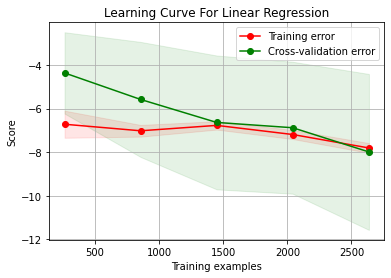

In [43]:
plot_learning_curve(best_model_LR, "Learning Curve For Linear Regression", X_train, y_train, 
                    axes=None, ylim=None, cv=cv, n_jobs=4)

[learning_curve] Training set sizes: [ 263  856 1449 2042 2636]
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of 500 | elapsed:    4.2s remaining: 11.8min
[Parallel(n_jobs=4)]: Done   9 out of 500 | elapsed:    5.3s remaining:  4.9min
[Parallel(n_jobs=4)]: Done  15 out of 500 | elapsed:    6.7s remaining:  3.6min
[Parallel(n_jobs=4)]: Done  21 out of 500 | elapsed:    7.8s remaining:  3.0min
[Parallel(n_jobs=4)]: Done  27 out of 500 | elapsed:    9.0s remaining:  2.7min
[Parallel(n_jobs=4)]: Done  33 out of 500 | elapsed:   10.1s remaining:  2.4min
[Parallel(n_jobs=4)]: Done  39 out of 500 | elapsed:   11.5s remaining:  2.3min
[Parallel(n_jobs=4)]: Done  45 out of 500 | elapsed:   13.1s remaining:  2.2min
[Parallel(n_jobs=4)]: Done  51 out of 500 | elapsed:   14.1s remaining:  2.1min
[Parallel(n_jobs=4)]: Done  57 out of 500 | elapsed:   15.6s remaining:  2.0min
[Parallel(n_jobs=4)]: Done  63 out of 500 | elapsed:   16.6s 

<module 'matplotlib.pyplot' from 'C:\\Users\\Elie\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

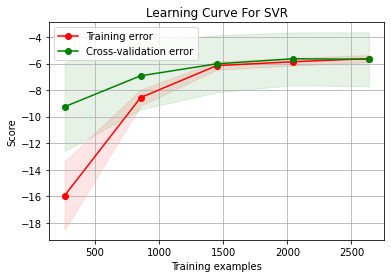

In [40]:
plot_learning_curve(best_model_SVR, "Learning Curve For SVR", X_train, y_train, 
                    axes=None, ylim=None, cv=cv, n_jobs=4)

[learning_curve] Training set sizes: [ 263  856 1449 2042 2636]
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of 500 | elapsed:    4.0s remaining: 11.4min
[Parallel(n_jobs=4)]: Done   9 out of 500 | elapsed:    4.3s remaining:  4.0min
[Parallel(n_jobs=4)]: Done  15 out of 500 | elapsed:    4.5s remaining:  2.5min
[Parallel(n_jobs=4)]: Done  21 out of 500 | elapsed:    4.6s remaining:  1.8min
[Parallel(n_jobs=4)]: Done  27 out of 500 | elapsed:    4.7s remaining:  1.4min
[Parallel(n_jobs=4)]: Done  33 out of 500 | elapsed:    4.8s remaining:  1.2min
[Parallel(n_jobs=4)]: Done  39 out of 500 | elapsed:    4.9s remaining:   59.2s
[Parallel(n_jobs=4)]: Done  45 out of 500 | elapsed:    5.0s remaining:   51.5s
[Parallel(n_jobs=4)]: Done  51 out of 500 | elapsed:    5.1s remaining:   45.6s
[Parallel(n_jobs=4)]: Done  57 out of 500 | elapsed:    5.2s remaining:   41.0s
[Parallel(n_jobs=4)]: Done  63 out of 500 | elapsed:    5.3s 

<module 'matplotlib.pyplot' from 'C:\\Users\\Elie\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

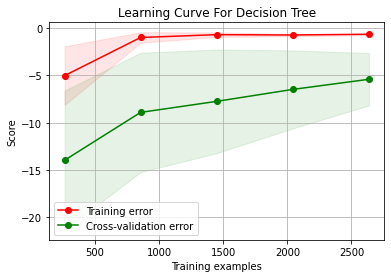

In [27]:
plot_learning_curve(best_model_DT, "Learning Curve For Decision Tree", X_train, y_train, 
                    axes=None, ylim=None, cv=cv, n_jobs=4)

In [ ]:
plot_learning_curve(best_model_RF, "Learning Curve For Random Forest", X_train, y_train, 
                    axes=None, ylim=None, cv=cv, n_jobs=4)

In [ ]:
plot_learning_curve(best_model_MLP, "Learning Curve For Feed Forward Neural Network", X_train, y_train, 
                    axes=None, ylim=None, cv=cv, n_jobs=4)

## Evaluating Models

We will assess the models with the tuned hyperparameters

In [19]:
model0 = Pipeline([
    ('poly', PolynomialFeatures(degree=best_lr['degree'], include_bias=best_lr['include_bias'])),
    ('elastic_net', ElasticNet(alpha = best_lr['alpha'], 
                    l1_ratio=best_lr['l1_ratio'], 
                    tol=best_lr['tol']))
])

model0.fit(X_train, y_train)
y_pred = model0.predict(X_test)
print_error_metrics(y_test, y_pred)

R2: 0.98477
MSE: 1.79853
RMSE: 1.34109
MAE: 0.42338


C:\Users\Elie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+03, tolerance: 2.697e+02
  model = cd_fast.enet_coordinate_descent(


In [20]:
model1 = SVR(C=best_svr['C'], kernel=best_svr['kernel'])

model1.fit(X_trainNorm, y_train)
y_pred = model1.predict(X_testNorm)
print_error_metrics(y_test, y_pred)

R2: 0.98037
MSE: 2.31757
RMSE: 1.52236
MAE: 0.26503


In [21]:
model2 = DecisionTreeRegressor(max_leaf_nodes=best_dt['max_leaf_nodes'], 
                            min_samples_leaf=best_dt['min_samples_leaf'], 
                            min_samples_split=best_dt['min_samples_split'],
                            max_depth=best_dt['max_depth'])
                            
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print_error_metrics(y_test, y_pred)

R2: 0.92057
MSE: 9.37917
RMSE: 3.06254
MAE: 0.91593


In [22]:
model3 = RandomForestRegressor(n_estimators=best_rf['n_estimators'], 
                                max_depth=best_rf['max_depth'], 
                                max_features=best_rf['max_features'],
                                min_samples_leaf=best_rf['min_samples_leaf'],
                                min_samples_split=best_rf['min_samples_split'],
                                bootstrap=best_rf['bootstrap'])

# model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print_error_metrics(y_test, y_pred)

R2: 0.96536
MSE: 4.09016
RMSE: 2.02242
MAE: 0.60422


In [23]:
model4 = MLPRegressor(activation = best_mlp['activation'],
                      solver = best_mlp['solver'],
                      hidden_layer_sizes = best_mlp['hidden_layer_sizes'],
                      max_iter = best_mlp['max_iter'])

model4.fit(X_trainNorm, y_train)
y_pred = model4.predict(X_testNorm)
print_error_metrics(y_test, y_pred)

R2: 0.98433
MSE: 1.84989
RMSE: 1.36011
MAE: 0.41938


## Interpretation of the Machine Learning Model

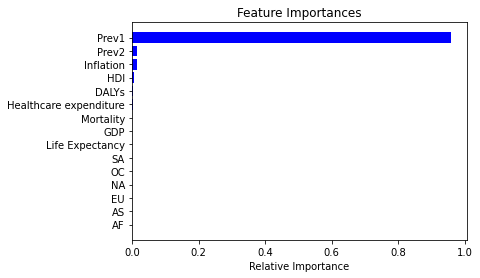

In [24]:
importances = model2.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

|--- Prev1 <= 15.47
|   |--- Prev1 <= -4.63
|   |   |--- Prev1 <= -13.05
|   |   |   |--- Inflation <= 33.19
|   |   |   |   |--- Prev1 <= -18.02
|   |   |   |   |   |--- Healthcare expenditure <= 80.10
|   |   |   |   |   |   |--- Prev2 <= -39.14
|   |   |   |   |   |   |   |--- value: [-12.41]
|   |   |   |   |   |   |--- Prev2 >  -39.14
|   |   |   |   |   |   |   |--- Prev1 <= -21.34
|   |   |   |   |   |   |   |   |--- Inflation <= 0.76
|   |   |   |   |   |   |   |   |   |--- value: [-25.38]
|   |   |   |   |   |   |   |   |--- Inflation >  0.76
|   |   |   |   |   |   |   |   |   |--- value: [-21.88]
|   |   |   |   |   |   |   |--- Prev1 >  -21.34
|   |   |   |   |   |   |   |   |--- Life Expectancy <= 69.60
|   |   |   |   |   |   |   |   |   |--- value: [-19.19]
|   |   |   |   |   |   |   |   |--- Life Expectancy >  69.60
|   |   |   |   |   |   |   |   |   |--- value: [-17.48]
|   |   |   |   |   |--- Healthcare expenditure >  80.10
|   |   |   |   |   |   |--- value: [-26.

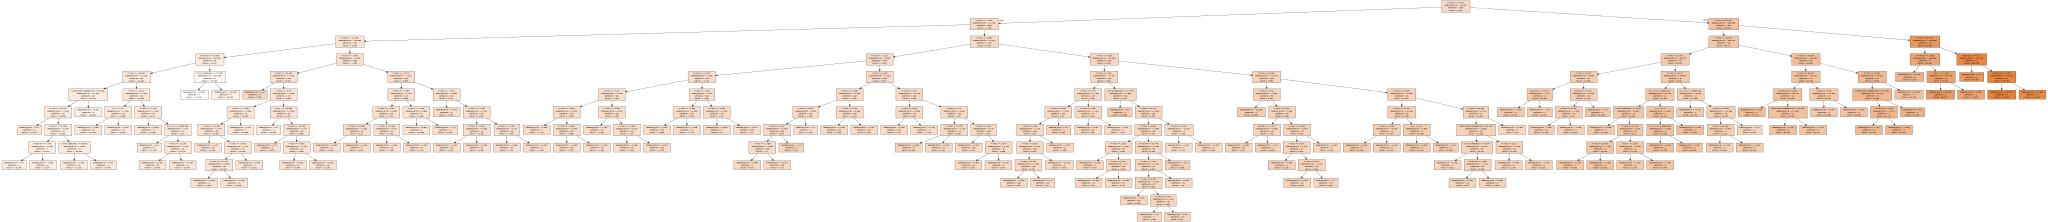

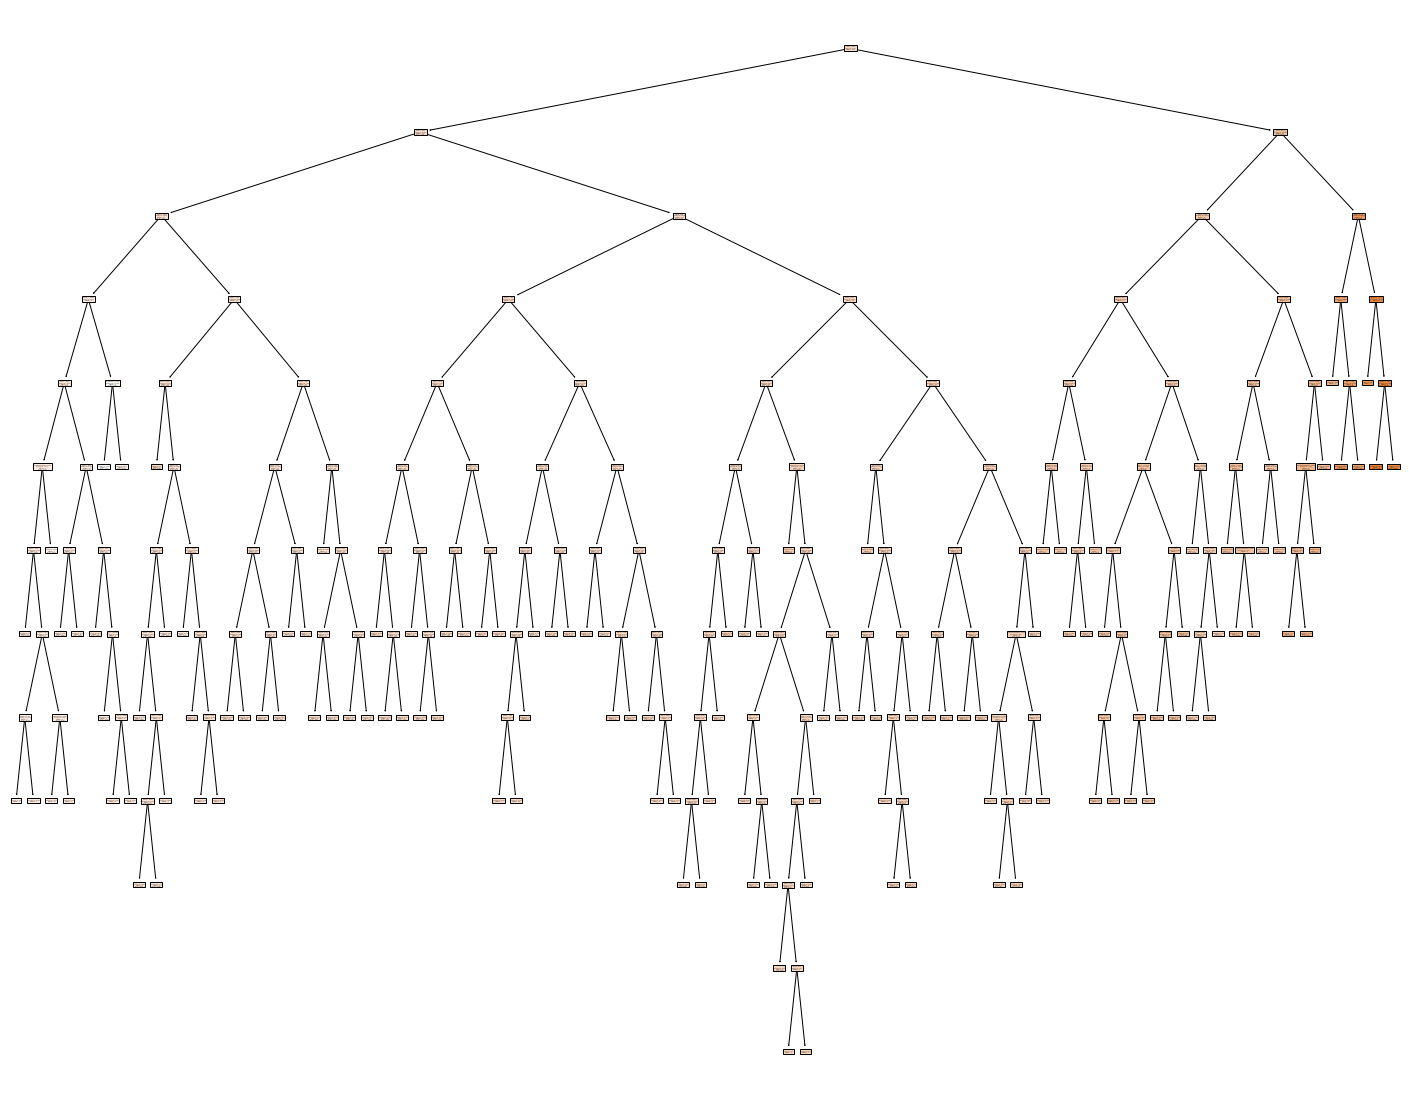

In [78]:
from sklearn import tree
import graphviz
txtRep = tree.export_text(model2, feature_names=list(x.columns))
print(txtRep)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2, feature_names=x.columns, filled=True)
dot_data = tree.export_graphviz(model2, out_file=None, 
                                feature_names=x.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png")

In [76]:
from shap import TreeExplainer
TreeExplainer(model2)

## Modeling a Feed Forward Neural Network using the Keras module

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2929, 18)
(2929,)
(733, 18)
(733,)


In [ ]:
def build_model(n_hidden=2, n_neurons=20, learning_rate=3e-3, input_shape=[18], activation="relu"):
    model = Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=cv)
rnd_search_cv.fir(X_trainNorm, y_train, epochs=100, callbacks=[keras.callbacks.EarlyStoping(patience=10)])

### Creating the model

We will define a Sequential model with the following:
   - 10 neurons in the input layer with activation function ``sigmoid``
   - 2 hidden layers each with 10 neurons and activation function ``sigmoid``
   - 1 output layer

In [26]:
model = Sequential()
model.add(Dense(10, input_shape = (len(X_trainNorm[0]),), activation = 'sigmoid'))
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(1))

#### Compiling the model

In [27]:
sgd = SGD(lr = 0.01)    # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse']) # for regression problems, mean squared error (MSE) is often employed

C:\Users\Elie\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary() # summary of the model

#### Training

In [28]:
history = model.fit(X_trainNorm, y_train, validation_split=0.1, batch_size = 50, epochs = 100, verbose = 0)

#### Evaluation

In [29]:
y_pred = model.predict(X_testNorm)
print_error_metrics(y_test, y_pred)

R2: 0.96847
MSE: 3.72278
RMSE: 1.92945
MAE: 0.62618


#### Plotting the learning curve

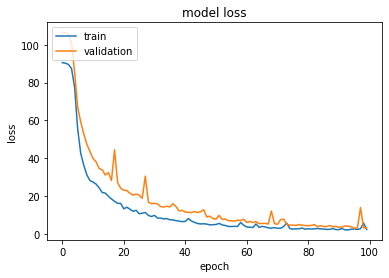

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()